<h3 style="text-align: center;">Lab 08: Multiband Raster</h3>

- This lab introduces the GIS raster operations using Rasterio and matplotlib libraries, such as read adn explore raster data files, band calculation. 

- There are four questions in total. Please provide your code answers directly below each question.

- Make sure to run all cells so that the answers are stored. Once completed, submit the .ipynb file (**ensuring that all answers are included**) to Canvas by **midnight (11:29 PM) on November 3**.

- This lab is worth a total of **65 points** and contributes **6.5%** toward the final grade.

## 1. Calculating NDWI
- Using **landsat.tif** for Question 1. landsat.tif is Landsat 9 data, check the [link](https://landsat.gsfc.nasa.gov/satellites/landsat-9/landsat-9-instruments/landsat-9-spectral-specifications/) here to see the details about band information. 

[NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index) is used to detect water content. 

NDWI = (Green - NIR)/(Green + NIR)

The range for NDWI is -1 to 1

This formula is used to enhance open water features which suppressing vegetation, soil, and other land cover. 

In [1]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot
import matplotlib.pyplot as plt
import numpy as np
import rasterio.mask

In [2]:
os.getcwd()

'd:\\github_gisynw\\ssj-302\\docs\\Labs\\Lab08'

In [3]:
dem_path = os.path.join(os.getcwd(),  "landsat.tif")
dem_path

'd:\\github_gisynw\\ssj-302\\docs\\Labs\\Lab08\\landsat.tif'

In [4]:
landsat = rasterio.open(dem_path)

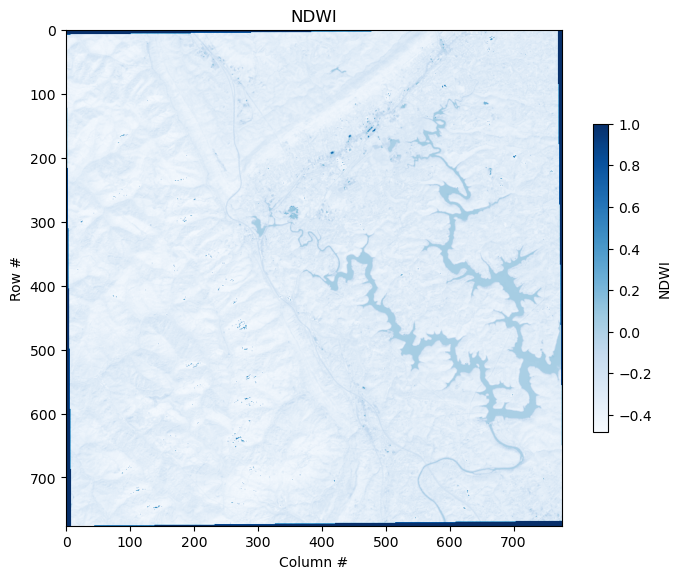

In [5]:
nir = landsat.read(5)
green_band = landsat.read(3)

ndwi = (green_band - nir) / (green_band + nir)

plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues")
plt.colorbar(label="NDWI", shrink=0.5)
plt.title("NDWI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## 2 Calculate Normalized Difference Built-Up Index (NDBI)

- Using **city.tif** for Question 2, city.tif is band 9 also. 
  
The Normalized Difference Built-Up Index (NDBI) is an index designed to highlight built-up or urban areas in satellite imagery. It is particularly effective for identifying urban regions, as built-up surfaces (such as buildings and roads) have a higher reflectance in the Shortwave Infrared (SWIR2) than in the Near Infrared (NIR).

NDBI = (SWIR2 - NIR) / (SWIR2 - NIR)

NDBI values range from -1 to 1

In [6]:
dem_path = os.path.join(os.getcwd(),  "city.tif")

landsat_city = rasterio.open(dem_path)

C:\Users\yyang\AppData\Local\Temp\ipykernel_5836\2276541706.py:4: RuntimeWarning: invalid value encountered in divide
  ndbi = (swir_band - nir) / (swir_band + nir)


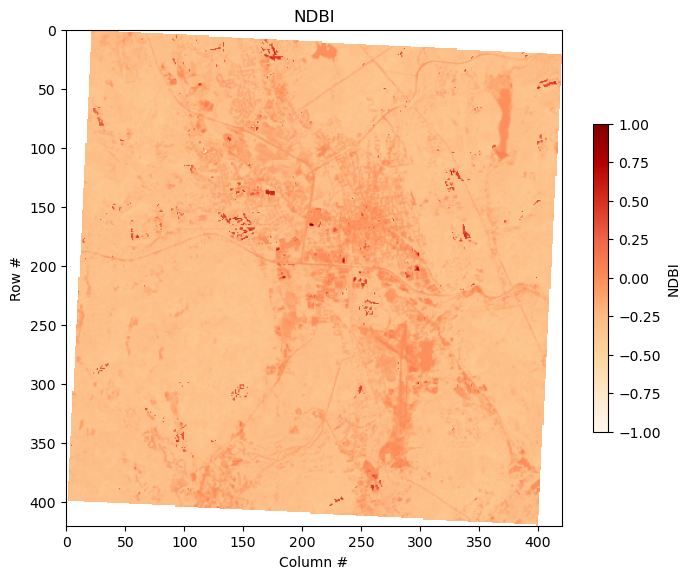

In [7]:
nir = landsat_city.read(5)
swir_band = landsat_city.read(7)

ndbi = (swir_band - nir) / (swir_band + nir)

# ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndbi, cmap="OrRd", vmin=-1, vmax=1)
plt.colorbar(label="NDBI", shrink=0.5)
plt.title("NDBI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## 3. Calculate Normalized Difference Vegetation Index (NDVI)

[NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) is calculated as:

NDVI = (NIR - Red) / (NIR + Red)

The range of NDVI is from -1  to 1

C:\Users\yyang\AppData\Local\Temp\ipykernel_5836\556425359.py:4: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)


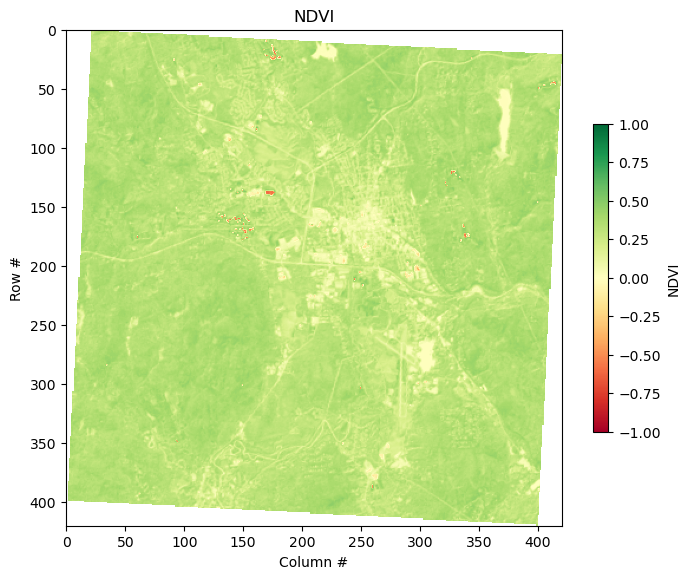

In [8]:
nir = landsat_city.read(5)
red_band = landsat_city.read(4)

ndvi = (nir - red_band) / (nir + red_band)

# ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.5)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## 4. Comparison of NDWI , NDBI and NDVI
Based on visually interpretation, please compare the different indices—NDVI, NDWI, and NDBI—and explain the types of objects or surfaces that each index is designed to highlight.

In [11]:
red_band = landsat_city.read(5)
green_band = landsat_city.read(4)
blue_band = landsat_city.read(3)

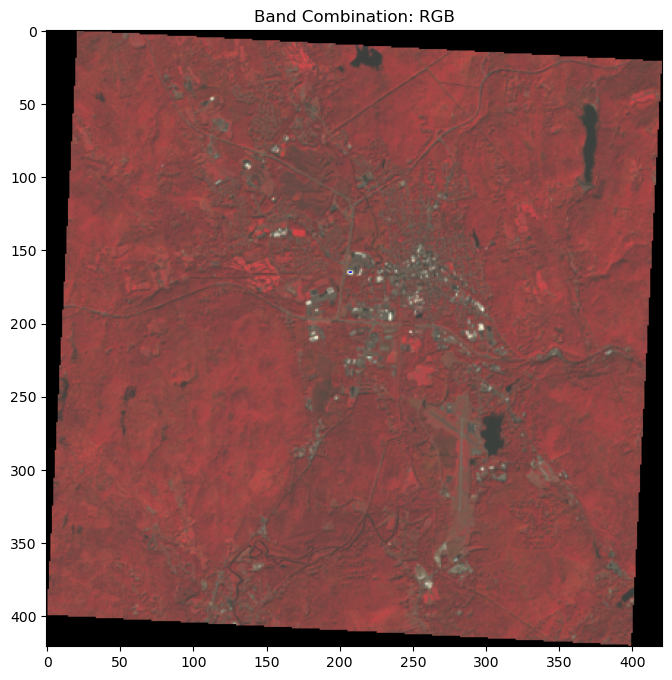

In [12]:
def normalize(array):
    array_max = array.max()
    return (array/array_max)

n_blue = normalize(blue_band)
n_red = normalize(red_band)
n_green = normalize(green_band)

# Stack the bands into a single array
rgb = np.dstack((n_red, n_green, n_blue)).clip(0, 1)

# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Band Combination: RGB")
plt.show()